## Probability Mass Funtions

In [2]:
from empiricaldist import Pmf
# moneda: cara o sello
coin = Pmf()
coin["heads"] = 1/2
coin["tails"] = 1/2
coin

,probs
heads,0.5
tails,0.5


In [4]:
# dado: 6 caras
die = Pmf.from_seq([1,2,3,4,5,6])
die

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In [6]:
letters = Pmf.from_seq(list("Mississippi"))
letters

,probs
M,0.090909
i,0.363636
p,0.181818
s,0.363636


In [9]:
letters["s"] # = letters("s")
# letters["t"] # return ERROR
# letters("t") # return 0

0.36363636363636365

In [15]:
die([1,4,7])

array([0.16666667, 0.16666667, 0.        ])

In [21]:
letters(["M", "s"]) # = letters[["M", "s"]]

array([0.09090909, 0.36363636])

## The Cookie Problem Revisited

In [55]:
# get vainilla
prior = Pmf.from_seq(["Bowl 1", "Bowl 2"])
likelihood_vanilla = [0.75, 0.5]
posterior = prior * likelihood_vanilla
posterior.normalize()
print("Bowl 1:\t",posterior("Bowl 1"))
print("Bowl 2:\t",posterior("Bowl 2"))
posterior

Bowl 1:	 0.6
Bowl 2:	 0.4


,probs
Bowl 1,0.6
Bowl 2,0.4


In [56]:
# sucesives updates
# 1st try: get vainilla
# 2nd try: get vainilla
posterior = prior * likelihood_vanilla
posterior *= likelihood_vanilla
posterior.normalize()
posterior

,probs
Bowl 1,0.692308
Bowl 2,0.307692


In [57]:
# sucesives updates
# 1st try: get vainilla
# 2nd try: get vainilla
# 3rd try: get chocolate
likelihood_chocolate = [0.25, 0.5]
posterior = prior * likelihood_vanilla
posterior *= likelihood_vanilla
posterior *= likelihood_chocolate
posterior.normalize()
posterior

,probs
Bowl 1,0.529412
Bowl 2,0.470588


## 101 bowls

* Bowl 0 contains 0% vanilla cookies,

* Bowl 1 contains 1% vanilla cookies,

* Bowl 2 contains 2% vanilla cookies,

and so on, up to

* Bowl 99 contains 99% vanilla cookies, and

* Bowl 100 contains all vanilla cookies.

In [49]:
import numpy as np
hypos = np.arange(101)
hypos

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [63]:
prior = Pmf(1, hypos) # + normalize = Pmf.from_seq(hypos)
prior.normalize()
prior.head()

,probs
0,0.009901
1,0.009901
2,0.009901


In [64]:
likelihood_vanilla = hypos/100
likelihood_vanilla[:5]

array([0.  , 0.01, 0.02, 0.03, 0.04])

In [65]:
posterior1 = prior * likelihood_vanilla
posterior1.normalize()
posterior1.head()

,probs
0,0.000000
1,0.000198
2,0.000396


<AxesSubplot:>

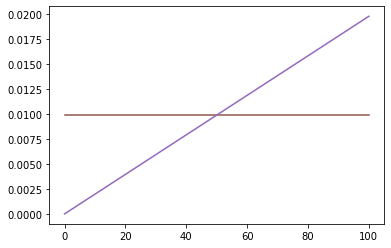

In [69]:
prior.plot(label='prior', color='C5')
posterior1.plot(label='posterior', color='C4')

In [72]:
posterior2 = posterior1 * likelihood_vanilla
posterior2.normalize()
posterior2.head()

,probs
0,0.000000
1,0.000003
2,0.000012


<AxesSubplot:>

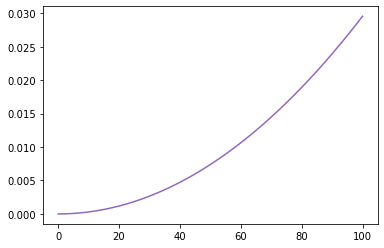

In [74]:
posterior2.plot(label='posterior', color='C4')

<AxesSubplot:>

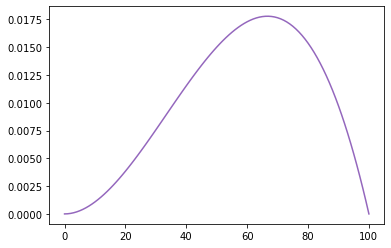

In [76]:
likelihood_chocolate = 1 - hypos/100
posterior3 = posterior2 * likelihood_chocolate
posterior3.normalize()
posterior3.plot(label="posterior", color="C4")

In [79]:
# idxmax() from Series class
# max_prob() from Pmf class
posterior3.max_prob() # = posterior.idxmax()

67

## The Dice Problem
> Suppose I have a box with a 6-sided die, an 8-sided die, and a 12-sided die. I choose one of the dice at random, roll it, and report that the outcome is a 1. What is the probability that I chose the 6-sided die?

In [82]:
hypos = [6, 8, 12]
prior = Pmf(1/3, hypos)
prior

,probs
6,0.333333
8,0.333333
12,0.333333


In [83]:
print(prior.qs) # quantities
print(prior.ps) # probabilities

[ 6  8 12]
[0.33333333 0.33333333 0.33333333]


In [90]:
likelihood_1 = 1/6, 1/8, 1/12
posterior = prior * likelihood1
posterior.normalize()
posterior

,probs
6,0.444444
8,0.333333
12,0.222222


In [91]:
likelihood_7 = 0, 1/8, 1/12
posterior *= likelihood_7
posterior.normalize()
posterior

,probs
6,0.000000
8,0.692308
12,0.307692


## Updating Dice 

In [95]:
def update_dice(pmf, data):
    hypos = pmf.qs
    likelihood = 1/hypos
    impossible = data > hypos
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

In [97]:
pmf = prior.copy()
update_dice(pmf, 1)
update_dice(pmf, 7)
pmf

,probs
6,0.000000
8,0.692308
12,0.307692


## Exercises

**Exercise 1**

Suposse I have a box with a 6-sided die, an 8-sided die, and a 12-sided die. I choose one of the dice at random, roll it four times, and get 1, 3, 5, and 7. What is the probability that I chose the 8-sided die?

In [107]:
ex1 = Pmf.from_seq([6, 8, 12])
for i in [1,3,5,7]:
    update_dice(ex1, i)
print(ex1)

# OR

likelihood_1 = 1/6, 1/8, 1/12
likelihood_3 = 1/6, 1/8, 1/12
likelihood_5 = 1/6, 1/8, 1/12
likelihood_7 = 0, 1/8, 1/12
prior = Pmf.from_seq([6, 8, 12])
posterior = prior * likelihood_1
posterior *= likelihood_3
posterior *= likelihood_5
posterior *= likelihood_7
posterior.normalize()
posterior

6     0.000000
8     0.835052
12    0.164948
Name: , dtype: float64


,probs
6,0.000000
8,0.835052
12,0.164948


**Exercise 2**

In the previous version of the dice problem, the prior probabilities are the same because the box contains one of each die. But suppose the box contains 1 die that is 4-sided, 2 dice that are 6-sided, 3 dice that are 8-sided, 4 dice that are 12-sided, and 5 dice that are 20-sided. I choose a die, roll it, and get a 7. What is the probability that I chose an 8-sided die?

In [125]:
prior = Pmf([1/15, 2/15, 3/15, 4/15, 5/15], [4, 6, 8, 12, 20])
likelihood_7 = [0, 0, 1/8, 1/12, 1/20]
posterior = prior * likelihood_7
posterior.normalize()
posterior

,probs
4,0.000000
6,0.000000
8,0.391304
12,0.347826
20,0.260870


**Exercise 3**

Suppose I have two sock drawers. One contains equal numbers of black and white socks. The other contains equal numbers of red, green, and blue socks. Suppose I choose a drawer at random, choose two socks at random, and I tell you that I got a matching pair. What is the probability that the socks are white?

For simplicity, let’s assume that there are so many socks in both drawers that removing one sock makes a negligible change to the proportions.

In [122]:
# sd1: n BLACK, n WHITE
# sd2: k RED, k GREEN, k BLUE
# I get 2 (same color) from sd1 or sd2
# P(2 WHITE)?
prior = Pmf([1/2, 1/2], ["sd1", "sd2"])
likelihood_pair = 1/2, 1/3
posterior = prior * likelihood_pair
posterior.normalize()
posterior["sd1"]/2

0.30000000000000004

**Exercise 4**

Elvis Presley had a twin brother (who died at birth). What is the probability that Elvis was an identical twin?

Hint: In 1935, about 2/3 of twins were fraternal and 1/3 were identical.

In [128]:
prior = Pmf([1/3, 2/3], ["IDENT", "FRATE"])
# Data: is twin brother (MALE)
likelihood = [1, 0.5]
posterior = prior * likelihood
posterior.normalize()
posterior

,probs
IDENT,0.5
FRATE,0.5
